## پیدا کردن خانه مناسب دانشجویی در رشت


یکی از کارهایی که میخواستیم انجام بدیم این بود که یک خانه (دانشجویی) با قیمت
 مناسب برای خودمون پیدا کنیم. از این جهت یک سری داده حدود ۱۰۰ تا از جاهای مختلف استخراج کردم و به ذهنم رسید که بیام و یک مدل رگرسیون هم روی این داده ها برازش کنم.




  

## import libraries

In [1]:
#‌ وارد کردن کتابخانه های مورد نیاز
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn import  linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## load dataset

In [2]:
# خواندن فایل csv
filepath = 'https://docs.google.com/spreadsheets/d/1_B0reSRNs5_Se-5FPUtUB6AmjT511Ey2e6BjzrD4nY4/export?format=csv&gid=0'
dff = pd.read_csv(filepath , encoding='utf-8')
dff
# در این بلاک کد مستقیم از گوگل شیت دیتا ها وارد میشه اینکار باعث شده که اگه دیتایی اضافه شد به دیتاست نیاز به دانلود لوکال دیتاست نیست

,Rent,Deposit,DoB,Meterage,FloorNum,Area,District,NoB,Elevator,Parking,Storage,Balcony,link
0,25000000,450000000,1404,130,2,گلسار,1,3,1,1,1,0,https://divar.ir/v/%DB%B3-%D8%AE%D9%88%D8%A7%D...
1,8000000,200000000,1391,75,2,آزادگان,4,2,1,1,1,0,https://divar.ir/v/%D8%A7%D8%AC%D8%A7%D8%B1%D9...
2,3000000,400000000,1385,80,3,استقامت,2,2,0,1,1,0,https://divar.ir/v/%D8%A2%D9%BE%D8%A7%D8%B1%D8...
3,6000000,150000000,1395,100,1,استقامت,2,1,0,1,1,0,https://divar.ir/v/%D8%B7%D8%A8%D9%82%D9%87-%D...
4,7500000,320000000,1380,116,1,اسماعیل آباد,1,2,0,1,1,0,https://divar.ir/v/%D8%A7%D8%AC%D8%A7%D8%B1%D9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3000000,270000000,1392,85,2,نیروی دریایی,4,2,0,0,0,0,https://divar.ir/v/%D8%A7%D8%AC%D8%A7%D8%B1%D9...
115,5000000,200000000,1396,75,3,کوی مهر,5,2,0,1,1,0,https://divar.ir/v/%D8%A7%D8%AC%D8%A7%D8%B1%D9...
116,12000000,500000000,1402,85,4,گلسار,1,2,1,1,1,1,https://divar.ir/v/%D8%B1%D9%87%D9%86-%D9%88-%...
117,1500000,250000000,1392,55,1,یخ سازی,4,1,0,1,0,0,https://divar.ir/v/%D8%A7%D8%AC%D8%A7%D8%B1%D9...


## Preprocessing:
- NaN , null  , inf values
- dublicated rows
- Encode Area column (we droped the Area column and consider making another column with name of District and put corresponding number of the geographic Area in that column , meaning when we see Golsar we put the number 1 in the row of that data in the District column )
- change DoB to Age and scale nRent , Age , meterage
- outlier handling
- number of each variable (check to see why your dummy values are insignificent)

In [3]:
# حذف کردن ستونی که لینک های خانه های رو که استخراج کرده بودم رو در اون قرار داده بودم در اینجا کاربردی نخواهد داشت.
df = dff.drop(['link' , 'Area'] , axis=1)
current_year = 1404
df['Age'] = current_year - df['DoB']

In [4]:
# null values
print(df.isnull().sum())

Rent        0
Deposit     0
DoB         0
Meterage    0
FloorNum    0
District    0
NoB         0
Elevator    0
Parking     0
Storage     0
Balcony     0
Age         0
dtype: int64


In [5]:
# duplicates rows
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
df

,Rent,Deposit,DoB,Meterage,FloorNum,District,NoB,Elevator,Parking,Storage,Balcony,Age
0,25000000,450000000,1404,130,2,1,3,1,1,1,0,0
1,8000000,200000000,1391,75,2,4,2,1,1,1,0,13
2,3000000,400000000,1385,80,3,2,2,0,1,1,0,19
3,6000000,150000000,1395,100,1,2,1,0,1,1,0,9
4,7500000,320000000,1380,116,1,1,2,0,1,1,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...
114,3000000,270000000,1392,85,2,4,2,0,0,0,0,12
115,5000000,200000000,1396,75,3,5,2,0,1,1,0,8
116,12000000,500000000,1402,85,4,1,2,1,1,1,1,2
117,1500000,250000000,1392,55,1,4,1,0,1,0,0,12


### Plots:

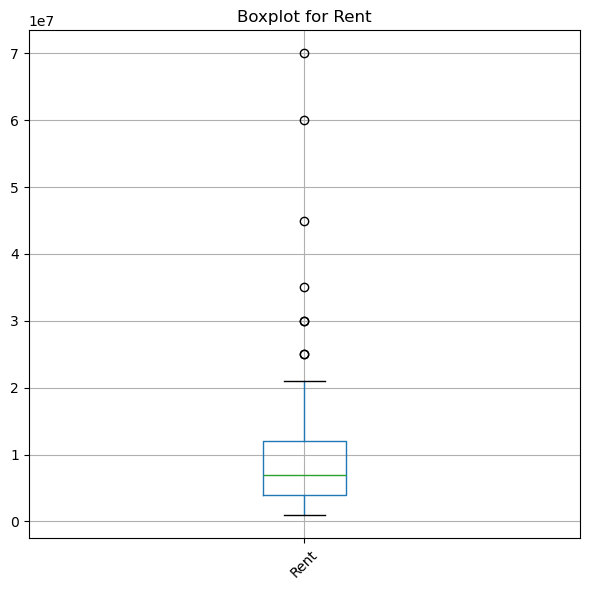

In [6]:
# Assuming df is your DataFrame
dfB = df[['Rent']]
dfB.boxplot(figsize=(6, 6))
plt.title("Boxplot for Rent")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

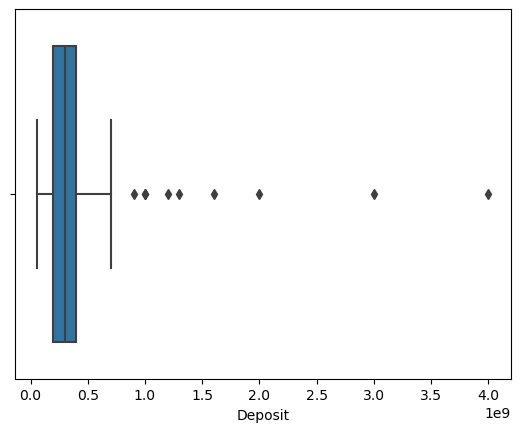

In [7]:
sns.boxplot(x=df['Deposit'])
plt.show()

In [8]:
# FloorNum ,District,NoB,Elevator,Parking,Storage,Balcony
print(df['District'].value_counts())
print(df['FloorNum'].value_counts())
print(df['Balcony'].value_counts())
print(df['DoB'].value_counts())
print(df['NoB'].value_counts())
print(df['Elevator'].value_counts())
print(df['Parking'].value_counts())
print(df['Storage'].value_counts())

District
4    33
1    27
2    22
3    21
5    13
Name: count, dtype: int64
FloorNum
1    50
2    29
3    23
4    13
5     1
Name: count, dtype: int64
Balcony
0    89
1    27
Name: count, dtype: int64
DoB
1390    15
1395    12
1392    10
1401     9
1400     7
1397     7
1404     5
1396     5
1398     5
1388     5
1385     5
1391     4
1380     4
1402     4
1403     3
1399     3
1389     2
1386     2
1370     2
1393     2
1394     2
1383     2
1387     1
Name: count, dtype: int64
NoB
2    86
3    16
1    13
4     1
Name: count, dtype: int64
Elevator
0    73
1    43
Name: count, dtype: int64
Parking
1    89
0    27
Name: count, dtype: int64
Storage
1    105
0     11
Name: count, dtype: int64


In [9]:
df['NoB'] = df['NoB'].apply(lambda x: '3+' if x >= 3 else str(x))

In [10]:
df['FloorNum'] = df['FloorNum'].apply(lambda x: '3+' if x >= 3 else str(x))

In [11]:
df['DoB']

0      1404
1      1391
2      1385
3      1395
4      1380
       ... 
114    1392
115    1396
116    1402
117    1392
118    1390
Name: DoB, Length: 116, dtype: int64

In [12]:
print(df['NoB'].value_counts())
print(df['FloorNum'].value_counts())
print(df['DoB'].value_counts())

NoB
2     86
3+    17
1     13
Name: count, dtype: int64
FloorNum
1     50
3+    37
2     29
Name: count, dtype: int64
DoB
1390    15
1395    12
1392    10
1401     9
1400     7
1397     7
1404     5
1396     5
1398     5
1388     5
1385     5
1391     4
1380     4
1402     4
1403     3
1399     3
1389     2
1386     2
1370     2
1393     2
1394     2
1383     2
1387     1
Name: count, dtype: int64


## EDA

In [13]:
print(f"مینیمم متراژ؛  {df['Meterage'].min()}")
print(f" ماکسیمم متراژ: {df['Meterage'].max()}")

print(f"مینیمم سال ساخت؛  {df['DoB'].min()}")
print(f" ماکسیمم سال ساخت: {df['DoB'].max()}")

مینیمم متراژ؛  40
 ماکسیمم متراژ: 300
مینیمم سال ساخت؛  1370
 ماکسیمم سال ساخت: 1404


In [14]:
sns.jointplot(x='Meterage' , y='Rent' , data=df , alpha=0.6 )

/Users/pouniq/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pouniq/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [15]:
sns.barplot(x='FloorNum' , y='Rent' , data=df , alpha=0.5 )

<Axes: xlabel='FloorNum', ylabel='Rent'>

In [16]:
sns.barplot(x='NoB' , y='Rent' , data=df , alpha=0.5)

<Axes: xlabel='NoB', ylabel='Rent'>

In [17]:
sns.lmplot(x = 'Meterage' , y='Rent' , data=df)
# we can see that Rent and Meterage have a positive linear relation

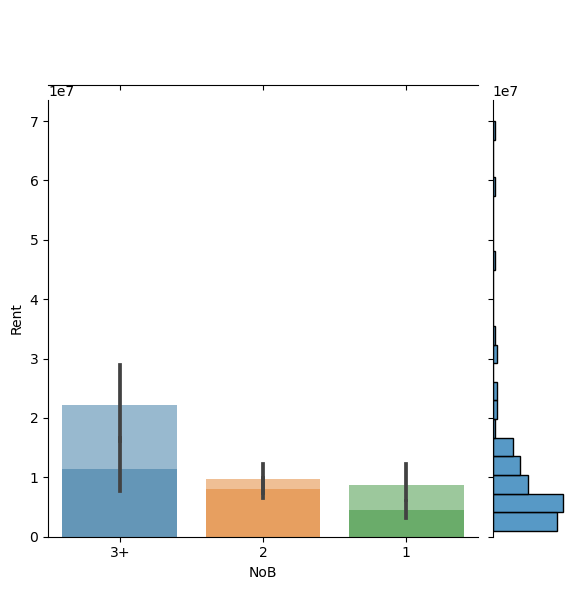

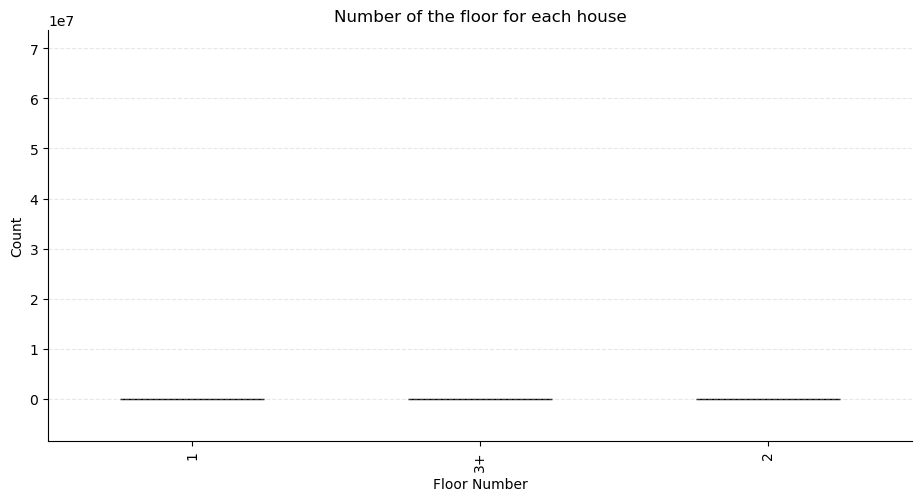

In [18]:
f = df['FloorNum'].value_counts()

f.plot.bar(
    color='purple', 
    edgecolor='black',
    figsize=(10, 5),
    title='Number of the floor for each house',
    xlabel='Floor Number',
    ylabel='Count'
)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [19]:
df = df[df['FloorNum'] != 5]

## Model_0 : Raw Data
-  $R^2 = 0.670$ the problem with this model is we did not 

In [20]:
df0 = df.copy()
df0

,Rent,Deposit,DoB,Meterage,FloorNum,District,NoB,Elevator,Parking,Storage,Balcony,Age
0,25000000,450000000,1404,130,2,1,3+,1,1,1,0,0
1,8000000,200000000,1391,75,2,4,2,1,1,1,0,13
2,3000000,400000000,1385,80,3+,2,2,0,1,1,0,19
3,6000000,150000000,1395,100,1,2,1,0,1,1,0,9
4,7500000,320000000,1380,116,1,1,2,0,1,1,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...
114,3000000,270000000,1392,85,2,4,2,0,0,0,0,12
115,5000000,200000000,1396,75,3+,5,2,0,1,1,0,8
116,12000000,500000000,1402,85,3+,1,2,1,1,1,1,2
117,1500000,250000000,1392,55,1,4,1,0,1,0,0,12


In [21]:
df0['DoB']

0      1404
1      1391
2      1385
3      1395
4      1380
       ... 
114    1392
115    1396
116    1402
117    1392
118    1390
Name: DoB, Length: 116, dtype: int64

In [22]:
df0 = df.copy()
Y = df0['Rent']
X = df0[['DoB' , 'Meterage']].assign(const = 1)

model = sm.OLS(Y , X)
results0 = model.fit()
print(results0.summary())

# note[2] : is from we did not normalize Rent column i think

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     114.6
Date:                Mon, 19 May 2025   Prob (F-statistic):           6.50e-28
Time:                        21:46:42   Log-Likelihood:                -1972.1
No. Observations:                 116   AIC:                             3950.
Df Residuals:                     113   BIC:                             3958.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DoB          1.39e+05   8.35e+04      1.665      0.0

In [23]:
df0['predictions'] = results0.fittedvalues
df0

,Rent,Deposit,DoB,Meterage,FloorNum,District,NoB,Elevator,Parking,Storage,Balcony,Age,predictions
0,25000000,450000000,1404,130,2,1,3+,1,1,1,0,0,1.777454e+07
1,8000000,200000000,1391,75,2,4,2,1,1,1,0,13,4.877274e+06
2,3000000,400000000,1385,80,3+,2,2,0,1,1,0,19,5.051553e+06
3,6000000,150000000,1395,100,1,2,1,0,1,1,0,9,1.047432e+07
4,7500000,320000000,1380,116,1,1,2,0,1,1,0,24,1.161577e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3000000,270000000,1392,85,2,4,2,0,0,0,0,12,7.032700e+06
115,5000000,200000000,1396,75,3+,5,2,0,1,1,0,8,5.572223e+06
116,12000000,500000000,1402,85,3+,1,2,1,1,1,1,2,8.422598e+06
117,1500000,250000000,1392,55,1,4,1,0,1,0,0,12,9.833924e+05


## Model_1 : making deposit and Rent in a one column
- $R^2 = 0.651$

In [24]:
df1 = df.copy()

In [25]:
# normalize two numerical columns
df1['Rent'] = df1['Rent'] / 1000000
df1['Deposit'] = df1['Deposit'] / 10000000

In [26]:
df1['nRent'] = df1['Rent'] + df1['Deposit'] 

In [27]:
Y = df1['nRent']
X = df1[['DoB', 'DoB','Meterage']].assign(const = 1)

model = sm.OLS(Y,X)
results1 = model.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  nRent   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     103.9
Date:                Mon, 19 May 2025   Prob (F-statistic):           2.46e-26
Time:                        21:46:42   Log-Likelihood:                -574.49
No. Observations:                 116   AIC:                             1155.
Df Residuals:                     113   BIC:                             1163.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DoB            0.5026      0.244      2.057      0.0

In [28]:
df1['predictions'] = results1.fittedvalues
df1

,Rent,Deposit,DoB,Meterage,FloorNum,District,NoB,Elevator,Parking,Storage,Balcony,Age,nRent,predictions
0,25.0,45.0,1404,130,2,1,3+,1,1,1,0,0,70.0,99.195141
1,8.0,20.0,1391,75,2,4,2,1,1,1,0,13,28.0,24.978793
2,3.0,40.0,1385,80,3+,2,2,0,1,1,0,19,43.0,24.506591
3,6.0,15.0,1395,100,1,2,1,0,1,1,0,9,21.0,56.794484
4,7.5,32.0,1380,116,1,1,2,0,1,1,0,24,39.5,59.505265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3.0,27.0,1392,85,2,4,2,0,0,0,0,12,30.0,37.101951
115,5.0,20.0,1396,75,3+,5,2,0,1,1,0,8,25.0,30.004779
116,12.0,50.0,1402,85,3+,1,2,1,1,1,1,2,62.0,47.153922
117,1.5,25.0,1392,55,1,4,1,0,1,0,0,12,26.5,3.748068


## Model_2: with Age variable:
- $R^2 = 0.651$
- we not gonna use that because we change DoB into dummy variables so we dont have DoB so we dont have Age

In [29]:
df2 = df1.copy()
current_year = 1404
df2['Age'] = df['Age']
df2 = df2[['nRent' , 'Age' , 'Meterage']]
df2
# not a good idea to change the DoB to Age
Y = df2['nRent']
X = df2[['Age','Meterage']].assign(const = 1)

model = sm.OLS(Y,X)
results2 = model.fit()
print(results2.summary())

df2['predictions'] = results2.fittedvalues
df2

# why when i changed DoB to age R^2 decresed
# because we have non-linear curve and forcing a linear like Age (current_year - DoB) can have loss in important information
sns.lmplot(x='DoB', y='Rent', data=df, lowess=True, line_kws={'color': 'red'})
sns.lmplot(x='Age', y='Rent', data=df, lowess=True, line_kws={'color': 'purple'})

                            OLS Regression Results                            
Dep. Variable:                  nRent   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     103.9
Date:                Mon, 19 May 2025   Prob (F-statistic):           2.46e-26
Time:                        21:46:42   Log-Likelihood:                -574.49
No. Observations:                 116   AIC:                             1155.
Df Residuals:                     113   BIC:                             1163.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -1.0052      0.489     -2.057      0.0

## Model_3: with Scaled variables (Z - score)
- $R^2 = 0.651$

In [30]:
df3 = df2.copy()

In [31]:
scaler =  StandardScaler() 
df3[['Age', 'Meterage' , 'nRent']] = scaler.fit_transform(df3[['Age', 'Meterage','nRent']])

In [32]:
df3

,nRent,Age,Meterage,predictions
0,0.311784,-1.534211,0.824510,99.195141
1,-0.416025,0.400229,-0.544666,24.978793
2,-0.156093,1.293048,-0.420195,24.506591
3,-0.537327,-0.194983,0.077687,56.794484
4,-0.216744,2.037063,0.475993,59.505265
...,...,...,...,...
114,-0.381368,0.251426,-0.295725,37.101951
115,-0.468011,-0.343786,-0.544666,30.004779
116,0.173153,-1.236605,-0.295725,47.153922
117,-0.442018,0.251426,-1.042548,3.748068


In [33]:
Y = df3['nRent']
X = df3[['Age','Meterage']].assign(const = 1)

model = sm.OLS(Y,X)
results3 = model.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  nRent   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     103.9
Date:                Mon, 19 May 2025   Prob (F-statistic):           2.46e-26
Time:                        21:46:42   Log-Likelihood:                -104.07
No. Observations:                 116   AIC:                             214.1
Df Residuals:                     113   BIC:                             222.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.1171      0.057     -2.057      0.0

In [34]:
df3['predictions'] = results3.fittedvalues
df3

,nRent,Age,Meterage,predictions
0,0.311784,-1.534211,0.824510,0.817700
1,-0.416025,0.400229,-0.544666,-0.468379
2,-0.156093,1.293048,-0.420195,-0.476562
3,-0.537327,-0.194983,0.077687,0.082948
4,-0.216744,2.037063,0.475993,0.129923
...,...,...,...,...
114,-0.381368,0.251426,-0.295725,-0.258299
115,-0.468011,-0.343786,-0.544666,-0.381285
116,0.173153,-1.236605,-0.295725,-0.084111
117,-0.442018,0.251426,-1.042548,-0.836281


## Model_4: with Scaled Variables (MinMaxScaler)
- $R^2 = 0.772$
- but actually the predictions that i have with this model is better and i dont get multicollinearity Error

In [35]:
df4 = df2.copy()

In [36]:
scaler =  MinMaxScaler()  
df4[['Age', 'Meterage' , 'nRent']] = scaler.fit_transform(df3[['Age', 'Meterage','nRent']])

In [37]:
Y = df4['nRent']
X = df4[['Age','Meterage']].assign(const = 1)

model = sm.OLS(Y,X)
results4 = model.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  nRent   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     103.9
Date:                Mon, 19 May 2025   Prob (F-statistic):           2.46e-26
Time:                        21:46:42   Log-Likelihood:                 136.98
No. Observations:                 116   AIC:                            -268.0
Df Residuals:                     113   BIC:                            -259.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0741      0.036     -2.057      0.0

In [38]:
df4['predictions'] = results4.fittedvalues
df4

,nRent,Age,Meterage,predictions
0,0.132321,0.000000,0.346154,0.195651
1,0.041215,0.382353,0.134615,0.034661
2,0.073753,0.558824,0.153846,0.033637
3,0.026030,0.264706,0.230769,0.103676
4,0.066161,0.705882,0.292308,0.109556
...,...,...,...,...
114,0.045553,0.352941,0.173077,0.060959
115,0.034707,0.235294,0.134615,0.045564
116,0.114967,0.058824,0.173077,0.082763
117,0.037961,0.352941,0.057692,-0.011392


## Using categorical Data
- FloorNum
- District
- NoB
---
are my categorical data

### moving forward we use the Model_4 data and structure

In [39]:
df = df.drop(['Meterage','Age'] , axis=1)

In [40]:
df['DoB'] = df['DoB'].apply(lambda x: f"{int(x // 10 * 10)}s")

In [41]:
def simplify_dob_group(x):
    if x in ['1370s', '1380s']:
        return 'Before 1390'
    else:
        return x

df['DoB'] = df['DoB'].apply(simplify_dob_group)

In [42]:
dataset = df4.copy()
dataset.head()
data = pd.concat([df4, df], axis=1)
data = data.drop(['Rent','Deposit']  , axis=1)
data

,nRent,Age,Meterage,predictions,DoB,FloorNum,District,NoB,Elevator,Parking,Storage,Balcony
0,0.132321,0.000000,0.346154,0.195651,1400s,2,1,3+,1,1,1,0
1,0.041215,0.382353,0.134615,0.034661,1390s,2,4,2,1,1,1,0
2,0.073753,0.558824,0.153846,0.033637,Before 1390,3+,2,2,0,1,1,0
3,0.026030,0.264706,0.230769,0.103676,1390s,1,2,1,0,1,1,0
4,0.066161,0.705882,0.292308,0.109556,Before 1390,1,1,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.045553,0.352941,0.173077,0.060959,1390s,2,4,2,0,0,0,0
115,0.034707,0.235294,0.134615,0.045564,1390s,3+,5,2,0,1,1,0
116,0.114967,0.058824,0.173077,0.082763,1400s,3+,1,2,1,1,1,1
117,0.037961,0.352941,0.057692,-0.011392,1390s,1,4,1,0,1,0,0


In [44]:
data.head()

,nRent,Age,Meterage,predictions,DoB,FloorNum,District,NoB,Elevator,Parking,Storage,Balcony
0,0.132321,0.000000,0.346154,0.195651,1400s,2,1,3+,1,1,1,0
1,0.041215,0.382353,0.134615,0.034661,1390s,2,4,2,1,1,1,0
2,0.073753,0.558824,0.153846,0.033637,Before 1390,3+,2,2,0,1,1,0
3,0.026030,0.264706,0.230769,0.103676,1390s,1,2,1,0,1,1,0
4,0.066161,0.705882,0.292308,0.109556,Before 1390,1,1,2,0,1,1,0


In [45]:
data = pd.get_dummies(data , columns=['FloorNum','District','NoB' , 'Elevator' , 'DoB'] , drop_first=True )
# drop_first help us to not fall into Multicollinearity trap. it compare remainder group to the reference group
data

,nRent,Age,Meterage,predictions,Parking,Storage,Balcony,FloorNum_2,FloorNum_3+,District_2,District_3,District_4,District_5,NoB_2,NoB_3+,Elevator_1,DoB_1400s,DoB_Before 1390
0,0.132321,0.000000,0.346154,0.195651,1,1,0,True,False,False,False,False,False,False,True,True,True,False
1,0.041215,0.382353,0.134615,0.034661,1,1,0,True,False,False,False,True,False,True,False,True,False,False
2,0.073753,0.558824,0.153846,0.033637,1,1,0,False,True,True,False,False,False,True,False,False,False,True
3,0.026030,0.264706,0.230769,0.103676,1,1,0,False,False,True,False,False,False,False,False,False,False,False
4,0.066161,0.705882,0.292308,0.109556,1,1,0,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.045553,0.352941,0.173077,0.060959,0,0,0,True,False,False,False,True,False,True,False,False,False,False
115,0.034707,0.235294,0.134615,0.045564,1,1,0,False,True,False,False,False,True,True,False,False,False,False
116,0.114967,0.058824,0.173077,0.082763,1,1,1,False,True,False,False,False,False,True,False,True,True,False
117,0.037961,0.352941,0.057692,-0.011392,1,0,0,False,False,False,False,True,False,False,False,False,False,False


In [46]:
data.columns

Index(['nRent', 'Age', 'Meterage', 'predictions', 'Parking', 'Storage',
       'Balcony', 'FloorNum_2', 'FloorNum_3+', 'District_2', 'District_3',
       'District_4', 'District_5', 'NoB_2', 'NoB_3+', 'Elevator_1',
       'DoB_1400s', 'DoB_Before 1390'],
      dtype='object')

In [47]:
print(df.columns.tolist())

['Rent', 'Deposit', 'DoB', 'FloorNum', 'District', 'NoB', 'Elevator', 'Parking', 'Storage', 'Balcony']


In [48]:
dummy_cols = ['FloorNum_2', 'FloorNum_3+', 'District_2', 'District_3',
       'District_4', 'District_5', 'NoB_2', 'NoB_3+', 'Elevator_1',
       'DoB_1400s', 'DoB_Before 1390']
selected_data = data[dummy_cols]
data[dummy_cols] = data[dummy_cols].astype(int)
data

,nRent,Age,Meterage,predictions,Parking,Storage,Balcony,FloorNum_2,FloorNum_3+,District_2,District_3,District_4,District_5,NoB_2,NoB_3+,Elevator_1,DoB_1400s,DoB_Before 1390
0,0.132321,0.000000,0.346154,0.195651,1,1,0,1,0,0,0,0,0,0,1,1,1,0
1,0.041215,0.382353,0.134615,0.034661,1,1,0,1,0,0,0,1,0,1,0,1,0,0
2,0.073753,0.558824,0.153846,0.033637,1,1,0,0,1,1,0,0,0,1,0,0,0,1
3,0.026030,0.264706,0.230769,0.103676,1,1,0,0,0,1,0,0,0,0,0,0,0,0
4,0.066161,0.705882,0.292308,0.109556,1,1,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.045553,0.352941,0.173077,0.060959,0,0,0,1,0,0,0,1,0,1,0,0,0,0
115,0.034707,0.235294,0.134615,0.045564,1,1,0,0,1,0,0,0,1,1,0,0,0,0
116,0.114967,0.058824,0.173077,0.082763,1,1,1,0,1,0,0,0,0,1,0,1,1,0
117,0.037961,0.352941,0.057692,-0.011392,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [49]:
X = data.drop(['nRent' , 'predictions' , 'Age'  ] , axis = 1).assign(const=1)
result = sm.OLS(Y , X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  nRent   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     14.80
Date:                Mon, 19 May 2025   Prob (F-statistic):           3.63e-19
Time:                        21:47:04   Log-Likelihood:                 144.27
No. Observations:                 116   AIC:                            -256.5
Df Residuals:                     100   BIC:                            -212.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Meterage            0.7441      0.070     

## + binary Variables
- these variables did not help the model at all even $R^2$ adjusted stayed the same as before so i will not use these:
    1. first of all storage have only 8 options that do not have Storage so i will not give us the signal that we need
    2. most of the houses in our dataset have parking so we can not make good assumptions about how much it influence our model
    3. but when used Elevator column it actually improved $R^2$ by 0.003 so i will used that because it is actually balanced 
  

In [50]:
# i comment this section due to insignificent of that in our model
# data = pd.get_dummies(data , columns=['Elevator','Parking','Storage'] , drop_first=True )
# data
# dummy_cols = ['Elevator_1', 'Parking_1', 'Storage_1']
# selected_data = data[dummy_cols]
# data[dummy_cols] = data[dummy_cols].astype(int)
# data
# X = data.drop(['nRent' , 'predictions'] , axis = 1).assign(const=1)
# result = sm.OLS(Y , X).fit()
# print(result.summary())

/Users/pouniq/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


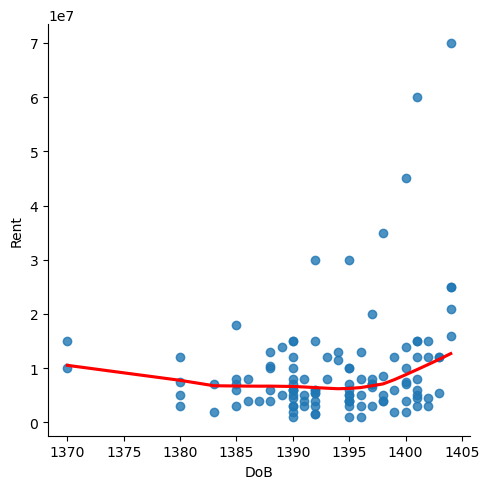

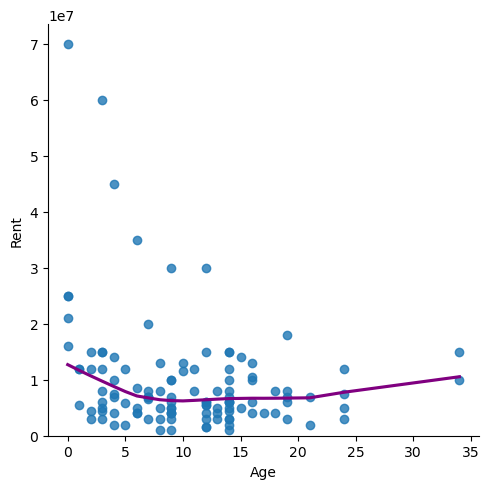

In [51]:
sns.histplot(data.nRent );
plt.show()

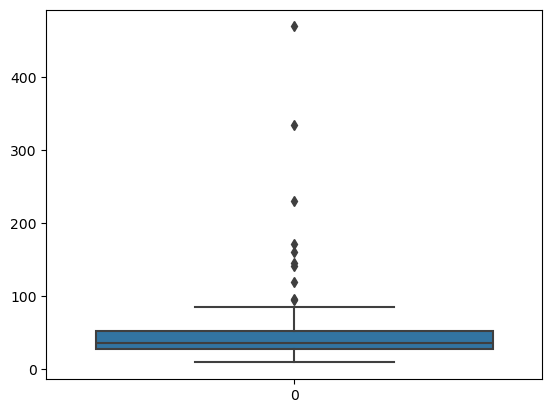

In [52]:
sns.boxplot(df1.nRent);
plt.show()

In [53]:
y = data.nRent

/Users/pouniq/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


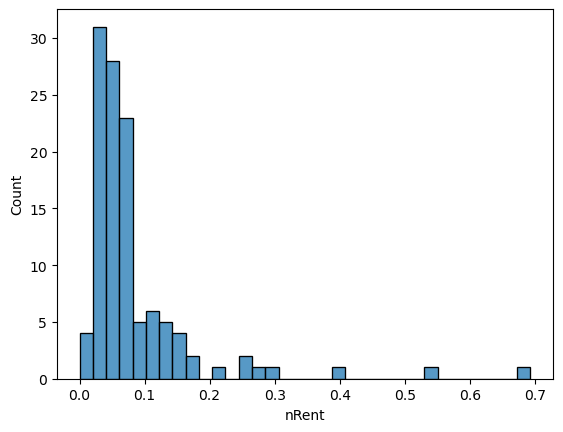

In [54]:
y = np.log1p(y)
sns.histplot(y)
plt.show()

/Users/pouniq/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


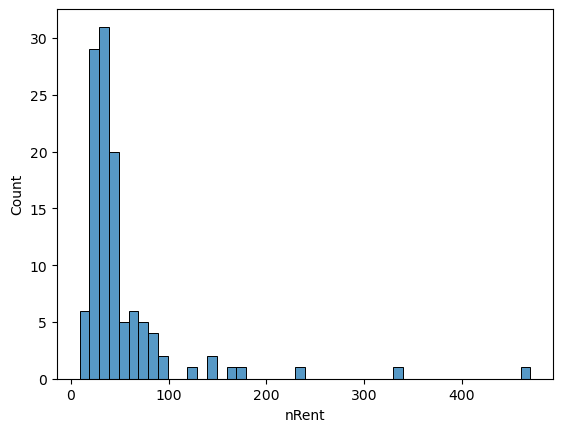

In [55]:
sns.histplot(df1.nRent)
plt.show()

In [56]:
X = data.drop(['nRent' , 'predictions' , 'Age'] , axis = 1).assign(const=1)
result = sm.OLS(y , X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  nRent   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     16.56
Date:                Mon, 19 May 2025   Prob (F-statistic):           8.57e-21
Time:                        21:47:04   Log-Likelihood:                 182.37
No. Observations:                 116   AIC:                            -332.7
Df Residuals:                     100   BIC:                            -288.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Meterage            0.5288      0.050     

## VIF

In [57]:
def vif(df):
    import pandas as pd
    from sklearn.linear_model import LinearRegression

    vif_dict , tol_dict = {} , {}
    for col in df.drop(columns=['const']):
        y = df[col]
        X = df.drop(columns=[col])
        r_sq = LinearRegression().fit(X,y).score(X,y)
        if r_sq < 1:
            vif = 1/(1-r_sq)
        else:
            vif = 100
        vif_dict[col] = vif
        tol = 1 - r_sq
        tol_dict[col] = tol

        df_output = pd.DataFrame({'vif' :vif_dict , 'tol' : tol_dict })
        
    return df_output.sort_values(by=['vif'] , ascending=False)

    


In [58]:
vif(X)

,vif,tol
NoB_3+,4.651257,0.214996
NoB_2,3.599205,0.277839
Meterage,2.380535,0.420074
District_4,2.017944,0.495554
FloorNum_3+,1.796259,0.556713
District_5,1.705410,0.586369
District_3,1.684983,0.593478
Elevator_1,1.684055,0.593805
District_2,1.678108,0.595909
FloorNum_2,1.634100,0.611958


# Aditionals

## Updates:
- when i delete some of the outliers my $R^2$ got lower than it was so i decide that i should keep them
- i noticed that i have only one instance of 4 bedroom houses and 15 3 bedroom houses  in this case i can put these into one case and call it 3+ (p_value actually improved , from )
- combined 3+ Floor number together and my $R^2$ actually improved
- when i put binary variables ['Elevator','Parking','Storage'] to my model i did not imporved anything so i might consider deleting them (using just Elevator column imporved my model)
- in DoB (data of building) column i grouped this column into 3 different sections DoB_1390s , DoB_1400s, (base category is "Before 1390") and my model improved actually pretty good

## Sources:
-  https://www.2nabsh.com/%D9%85%D8%AD%D9%84%D9%87/%D8%B1%D8%B4%D8%AA
-  https://www.youtube.com/watch?v=53lhpwa3rwY&ab_channel=JaradNiemi
-  https://www.youtube.com/watch?v=2IZKK3pJQjg&ab_channel=freeCodeCamp.org
-  oulier handling : https://www.youtube.com/watch?v=jmAuVP_UOn0&ab_channel=SixSigmaProSMART
-   https://www.youtube.com/watch?v=2hwR6ASF2yg&ab_channel=Prof.DavidStuckler
- https://www.biostat.jhsph.edu/courses/bio621/misc/Chocolate%20consumption%20cognitive%20function%20and%20nobel%20laurates%20(NEJM).pdf
-  https://library.virginia.edu/data/articles/getting-started-with-multivariate-multiple-regression#:~:text=Multivariate%20Multiple%20Regression%20is%20a,parent%20income%2C%20and%20so%20forth.
-  https://www.youtube.com/watch?v=3A1z9mUn8n8&ab_channel=DavidDunaetz
-  https://www.youtube.com/watch?v=53lhpwa3rwY (binary regression)
-  https://www.youtube.com/watch?v=9-M4SGzSx0k&list=PLe9UEU4oeAuXcYlG8Bs9uzceeXikeiurD&index=4&ab_channel=MarkKeith